In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
import numpy as np
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [3]:
df = pd.read_csv('colon.csv').drop('Unnamed: 0', axis=1)

In [4]:
df.shape

(1858, 15)

In [5]:
df.isnull().sum()

id           0
study        0
sex          0
age          0
obstruct     0
perfor       0
adhere       0
nodes       36
status       0
differ      46
extent       0
surg         0
node4        0
time         0
etype        0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1776.0,466.506757,269.321338,1.0,234.75,466.5,700.25,929.0
study,1776.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
sex,1776.0,0.518018,0.499816,0.0,0.00,1.0,1.00,1.0
age,1776.0,59.810811,11.911137,18.0,53.00,61.0,69.00,85.0
obstruct,1776.0,0.192568,0.394427,0.0,0.00,0.0,0.00,1.0
perfor,1776.0,0.030405,0.171748,0.0,0.00,0.0,0.00,1.0
adhere,1776.0,0.144144,0.351335,0.0,0.00,0.0,0.00,1.0
nodes,1776.0,3.663288,3.539129,0.0,1.00,2.0,5.00,33.0
status,1776.0,0.493243,0.500095,0.0,0.00,0.0,1.00,1.0
differ,1776.0,2.061937,0.510833,1.0,2.00,2.0,2.00,3.0


In [9]:
df.etype.value_counts()

2    888
1    888
Name: etype, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='etype', ylabel='count'>

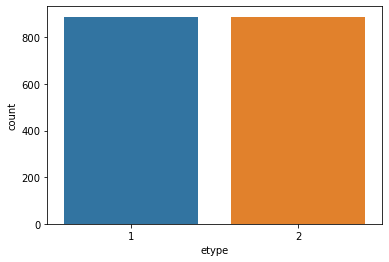

In [10]:
sns.countplot(df.etype)

In [12]:
x = df.drop('etype', axis=1)
y=df.etype
test_size=0.30
seed=7
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=test_size, random_state=seed)

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [14]:
model_score = model.score(x_test,y_test)
model_score

0.5684803001876173

In [15]:
metrics.confusion_matrix(y_test, y_predict)

array([[145, 113],
       [117, 158]], dtype=int64)

In [17]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.55      0.56      0.56       258
           2       0.58      0.57      0.58       275

    accuracy                           0.57       533
   macro avg       0.57      0.57      0.57       533
weighted avg       0.57      0.57      0.57       533

